In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)


In [3]:
data.duplicated().sum()

0

In [4]:
data.isnull().sum()

ID            0
Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64

In [5]:
data.drop('ID', axis=1, inplace=True)

In [6]:
data.head(10)

,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [7]:
# Categorical column count for 'Diagnosis'
categorical_count = data["Diagnosis"].value_counts()

# Counting the number of categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns  # Categorical columns are of 'object' type
numerical_columns = data.select_dtypes(include=[np.number]).columns  # Numerical columns are of 'number' type

# Displaying the counts for each
print("\nCategorical Label Counts (Diagnosis):")
print(categorical_count)

print(f"\nTotal Categorical Columns: {len(categorical_columns)}")
print(f"Total Numerical Columns: {len(numerical_columns)}")

# You can also print the actual columns
print("\nNumerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)



Categorical Label Counts (Diagnosis):
B    357
M    212
Name: Diagnosis, dtype: int64

Total Categorical Columns: 1
Total Numerical Columns: 30

Numerical Columns:
Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15',
       'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20',
       'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25',
       'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30'],
      dtype='object')

Categorical Columns:
Index(['Diagnosis'], dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["Diagnosis"] = label_encoder.fit_transform(data["Diagnosis"])

In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop("Diagnosis", axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=numerical_columns)
data_scaled["Diagnosis"] = data["Diagnosis"]

In [10]:
# Outlier Detection for Individual Features
from scipy.stats import zscore

# Calculate Z-scores directly on the DataFrame's numerical columns
z_scores = data_scaled[numerical_columns].apply(zscore)

# Initialize dictionaries to store outlier count and percentage for each feature
outlier_counts = {}
outlier_percentages = {}

# Loop through each feature to calculate outliers individually
for feature in numerical_columns:
    feature_outliers = np.sum(z_scores[feature] > 3)  # Count of outliers in this feature
    outlier_percentage = (feature_outliers / data_scaled.shape[0]) * 100  # Percentage of outliers

    # Store in dictionaries
    outlier_counts[feature] = feature_outliers
    outlier_percentages[feature] = outlier_percentage

    print(f"Feature: {feature}")
    print(f"Outlier Count: {feature_outliers}")
    print(f"Outlier Percentage: {outlier_percentage:.2f}%\n")

# Print summaries for all features
print("Outlier Counts by Feature:", outlier_counts)



Feature: Feature_1
Outlier Count: 5
Outlier Percentage: 0.88%

Feature: Feature_2
Outlier Count: 4
Outlier Percentage: 0.70%

Feature: Feature_3
Outlier Count: 7
Outlier Percentage: 1.23%

Feature: Feature_4
Outlier Count: 8
Outlier Percentage: 1.41%

Feature: Feature_5
Outlier Count: 4
Outlier Percentage: 0.70%

Feature: Feature_6
Outlier Count: 9
Outlier Percentage: 1.58%

Feature: Feature_7
Outlier Count: 9
Outlier Percentage: 1.58%

Feature: Feature_8
Outlier Count: 6
Outlier Percentage: 1.05%

Feature: Feature_9
Outlier Count: 5
Outlier Percentage: 0.88%

Feature: Feature_10
Outlier Count: 7
Outlier Percentage: 1.23%

Feature: Feature_11
Outlier Count: 7
Outlier Percentage: 1.23%

Feature: Feature_12
Outlier Count: 9
Outlier Percentage: 1.58%

Feature: Feature_13
Outlier Count: 8
Outlier Percentage: 1.41%

Feature: Feature_14
Outlier Count: 6
Outlier Percentage: 1.05%

Feature: Feature_15
Outlier Count: 7
Outlier Percentage: 1.23%

Feature: Feature_16
Outlier Count: 12
Outlier Per

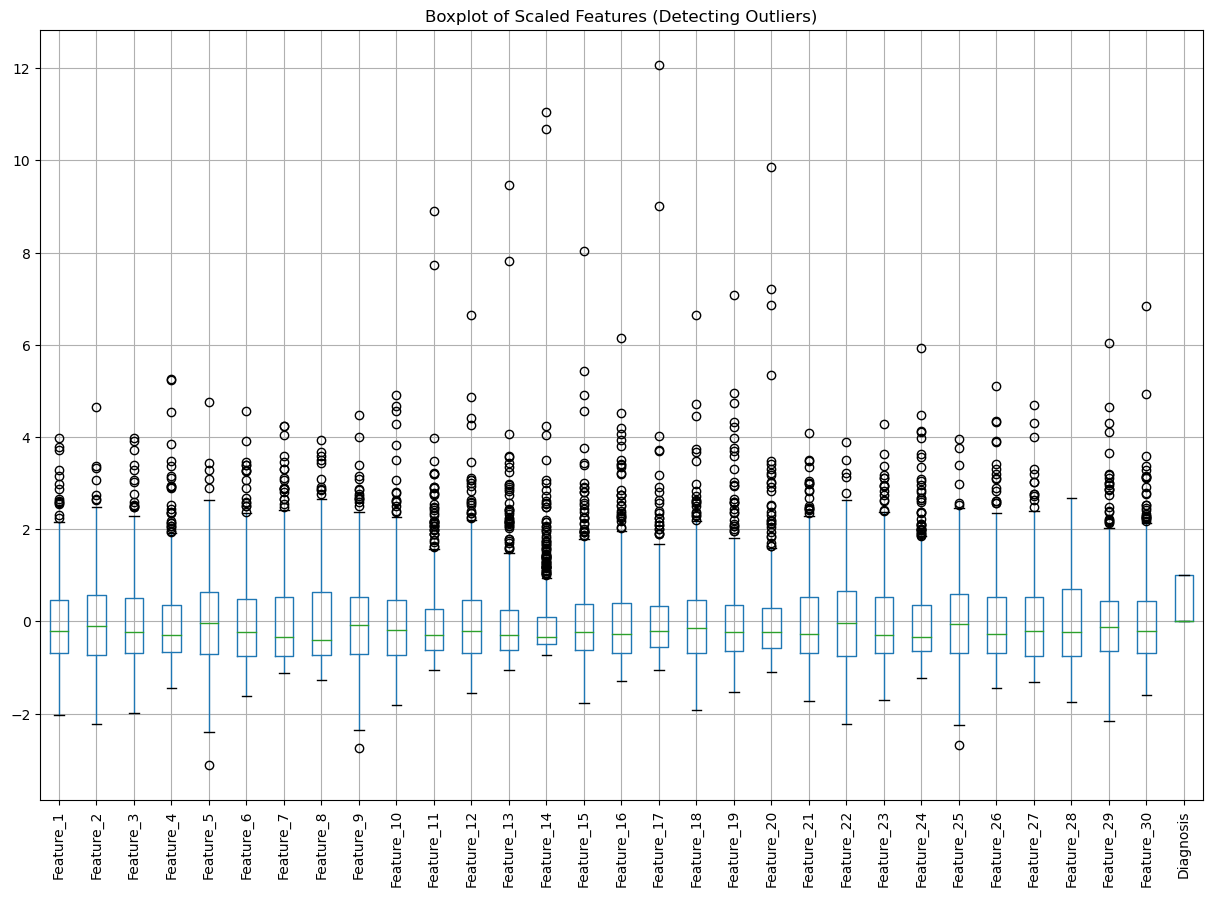

In [11]:
plt.figure(figsize=(15, 10))
data_scaled.boxplot()
plt.title("Boxplot of Scaled Features (Detecting Outliers)")
plt.xticks(rotation=90)
plt.show()

In [12]:
z_scores = np.abs(zscore(data_scaled[numerical_columns]))
outliers = (z_scores > 3).any(axis=1)
data_no_outliers = data_scaled[~outliers]

In [14]:
# Separating features and target variable
from sklearn.metrics import f1_score
X = data_no_outliers.drop("Diagnosis", axis=1)
y = data_no_outliers["Diagnosis"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada_model.fit(X_train, y_train)

# Predict and Evaluate Model Performance
y_pred = ada_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [15]:
# Step 4: Print Performance Metrics
print("\nModel Performance Metrics (After Removing Outliers):")
print(f"{'Metric':<15}{'Score':<10}")
print("-" * 25)
print(f"{'Accuracy':<15}{accuracy:.2f}")
print(f"{'Precision':<15}{precision:.2f}")
print(f"{'Recall':<15}{recall:.2f}")
print(f"{'F1 Score':<15}{f1:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)


Model Performance Metrics (After Removing Outliers):
Metric         Score     
-------------------------
Accuracy       1.00
Precision      1.00
Recall         1.00
F1 Score       1.00

Confusion Matrix:
 [[61  0]
 [ 0 38]]
